In [171]:
from typing import Annotated
from langchain_google_genai import ChatGoogleGenerativeAI
import os
from dotenv import load_dotenv
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from dotenv import load_dotenv
from IPython.display import Image, display
import gradio as gr
from langgraph.graph.message import add_messages
from pydantic import BaseModel

In [172]:
#learning use of annotated
def first_function(message:Annotated[str,"Some random message"])->str:
    message = message+"!"
    return message.upper()

newmessage =first_function("Hello Hi there")
print(newmessage)



HELLO HI THERE!


In [173]:
load_dotenv(override=True)

True

In [174]:
google_api_key = os.getenv("GEMINI_API_KEY")
google_model = "gemini-2.0-flash"


In [175]:
class State(BaseModel):
    messages : Annotated[list,"Here the user input"]

In [176]:
llm = ChatGoogleGenerativeAI(model=google_model,api_key=google_api_key)

In [177]:
def chatbot_node(old_state:State)->State:
    response = llm.invoke(old_state.messages)
    new_state = State(messages=[response])
    return new_state



In [178]:
graph_builder = StateGraph(State)

In [179]:
graph_builder.add_node("ChatBot",chatbot_node)

In [180]:
graph_builder.add_edge(START,"ChatBot")
graph_builder.add_edge("ChatBot",END)

In [181]:
graph = graph_builder.compile()

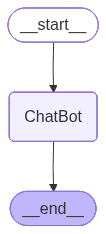

In [182]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [183]:
def chat(user_input:str,history):
    initial_state = State(messages=[{"role":"user","content":user_input}])
    result = graph.invoke(initial_state)
    print(result)

    return result['messages'][0].content

In [184]:

gr.ChatInterface(chat,type="messages").launch()

* Running on local URL:  http://127.0.0.1:7884
* To create a public link, set `share=True` in `launch()`.


In [185]:
from langchain_community.utilities import GoogleSerperAPIWrapper

In [186]:
serper = GoogleSerperAPIWrapper()
serper.run("whats gold rate today in rupees")

"The price of gold in India today is ₹12,393 per gram for 24 karat gold, ₹11,360 per gram for 22 karat gold and ₹9,295 per gram for 18 karat gold (also ... The Holdings Calculator permits you to calculate the current value of your gold and silver. Enter a number Amount in the left text field. Select Ounce, Gram ... Check today's gold rate in India and also get current 22 & 24 Carat gold price for 1 grams to 10 grams in india along with historical price trends at Groww. Gold Price in India · 24 Carat Gold Rate (10 grams). ₹ 1,21,800 +1,860 (+1.55%) · 22 Carat Gold Rate (10 grams). ₹ 1,11,570 +1,860 (+1.55%). Gold Rate Today (as on 08-10, 2025) · 24 Karat Gold (999 purity) : ₹12,210 per gram · 22 Karat Gold (91.6% purity) : ₹11,203 per gram. 22 Carat Gold Rate (Today & Yesterday) ; 1 Gram, ₹ 11,335, ₹ 11,230 ; 10 Gram, ₹ 113,350, ₹ 112,300 ; 100 Gram, ₹ 1,133,500, ₹ 1,123,000 ... Gold Rate Today - Get live 22, 24 CT gold price today in India per 1 gram, 8 gram, 10 gram & 100 gram. Also, 

In [187]:
from langchain.agents import Tool
search_tool= Tool(
    name="search",
    func=serper.run,
    description="this is for searching"
)

In [188]:
search_tool.invoke("today's latest news")

'View the latest news and breaking news today for U.S., world, weather, entertainment, politics and health at CNN.com. Illinois Gov. JB Pritzker listens as Chicago Mayor Brandon Johnson speaks on Oct. 6. Illinois leaders condemn \'unconstitutional invasion\' of National Guard. Read full articles, watch videos, browse thousands of titles and more on the "Home page" topic with Google News. Latest Breaking News Today from Fox News · Former FBI chief pleads not guilty after explosive grand jury investigation · Social media erupts after top Dem ... Trump said ICE would target \'criminals.\' · 3 scientists win Nobel Prize in chemistry for developing \'Hermione\'s handbag\' materials · Bourbon suffers \'significant ... Your trusted source for breaking news, analysis, exclusive interviews, headlines, and videos at ABCNews.com. Senate holds more votes on Day 8 of government shutdown · Ex-FBI chief James Comey pleads not guilty to charges of lying to Congress · Florida man arrested for ... Read 